<a href="https://colab.research.google.com/github/aveerdram/Decision-tree/blob/main/%D0%A2%D0%B5%D0%BB%D0%B5%D1%84%D0%BE%D0%BD%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.read_csv('train.csv')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('train.csv')

df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


Посмотрим среднее значение, среднеквадратичное отклонение, квартили, минимумы и максимумы.

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Пропуски

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Дубликаты

In [ ]:
df.duplicated().all()

False

Зависимости между признаками

In [ ]:
sns.set()
sns.set_style('darkgrid')

<Axes: >

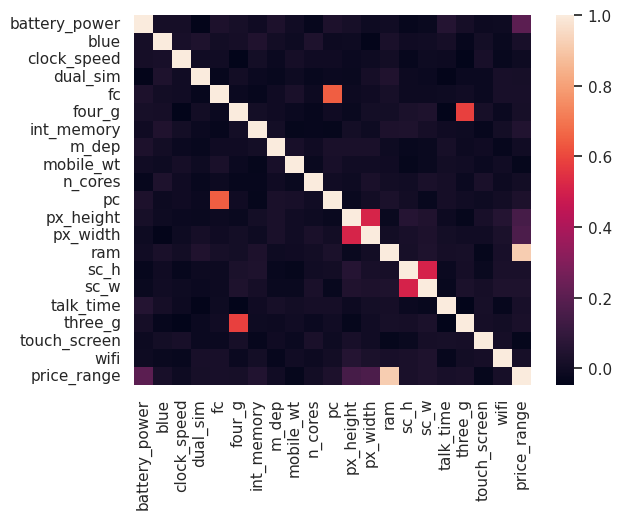

In [ ]:
sns.heatmap(df.corr())

По тепловой карте видно, что между собой относительно сильно коррелируют признаки, цвета которых светлые. Также есть относительно сильные зависимости некоторых признаков от таргета.

Выбросы

<Axes: xlabel='fc'>

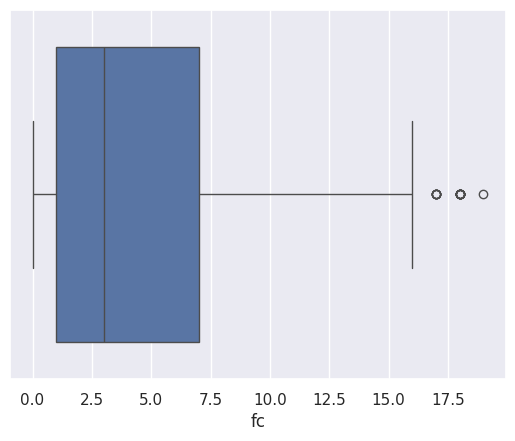

In [ ]:
sns.boxplot(x=df['fc'])

<Axes: xlabel='px_height'>

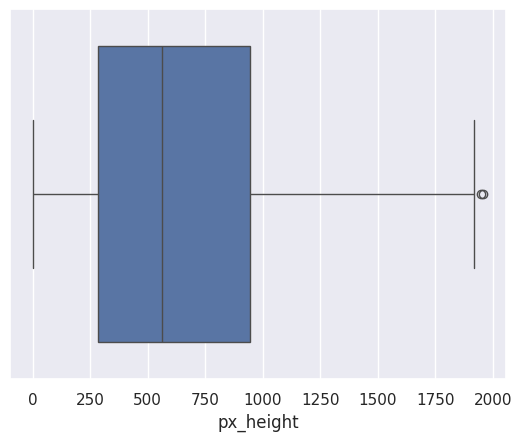

In [ ]:
sns.boxplot(x=df['px_height'])

Разделим набор данных на тренировочный и тестовый.

In [ ]:
X = df.drop('price_range', axis=1)

In [ ]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
y = df.price_range

y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Обучим классификатор DecisionTreeClassifier на тренировочном наборе.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=8)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=8)

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.822)

Используем обученную модель на тестовых данных

In [ ]:
y_pred = clf.predict(X_test)

Оцените полученные результаты с помощью нескольких метрик

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

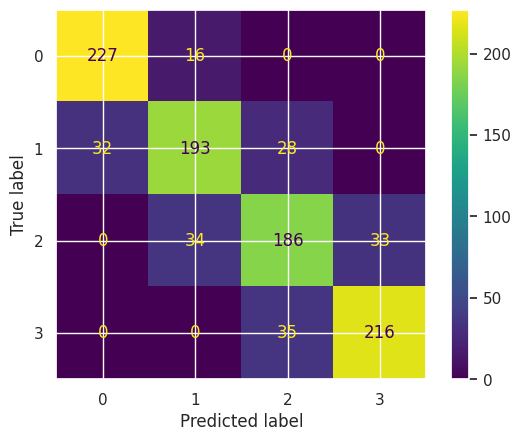

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clf.classes_);

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.88      0.93      0.90       243
     class 1       0.79      0.76      0.78       253
     class 2       0.75      0.74      0.74       253
     class 3       0.87      0.86      0.86       251

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



Визуализируем и интерпретируем обученную модель.

In [ ]:
from sklearn.tree import plot_tree

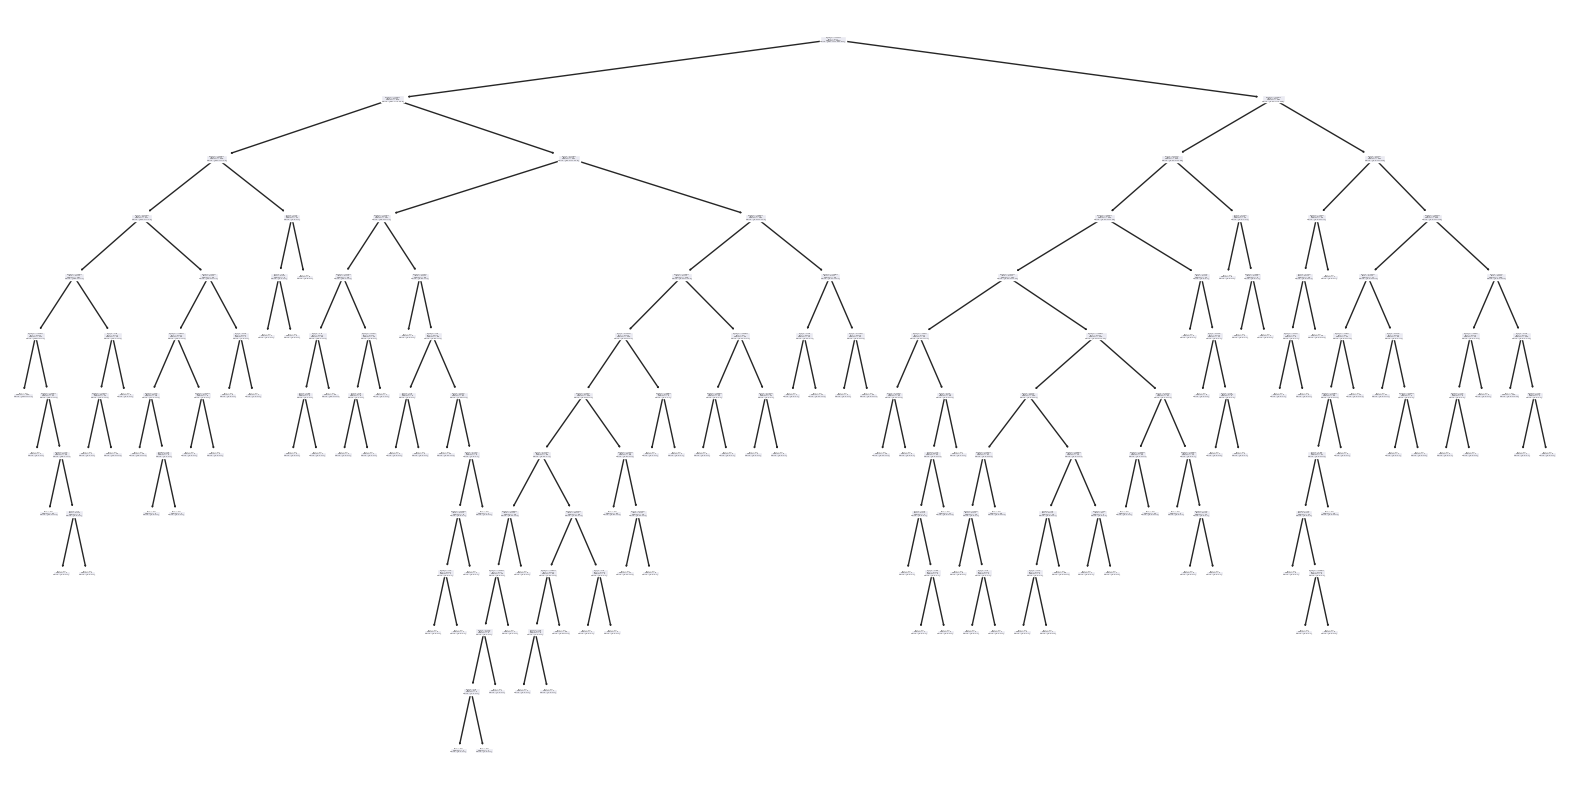

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf);

Кажется, модель переобучилась. Изменим её параметры, например:

max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=8)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=8)

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.842, 0.776)

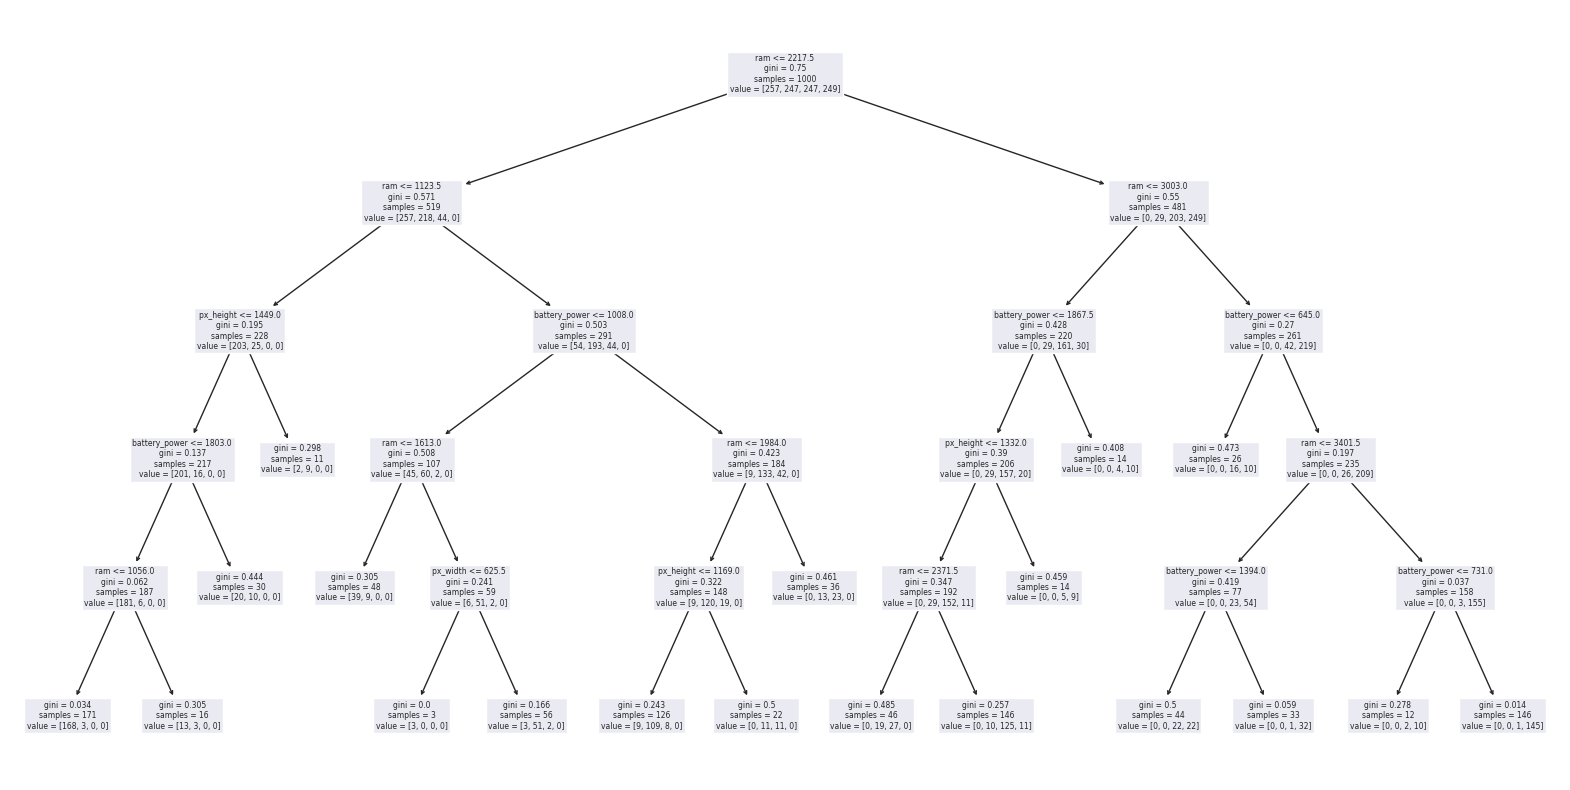

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=clf.feature_names_in_);

Удалим выбросы, посмотрим на дерево сейчас.

In [ ]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

df = remove_outliers(df, 'fc')
df = remove_outliers(df, 'px_height')

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=8)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=8)

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.842, 0.776)

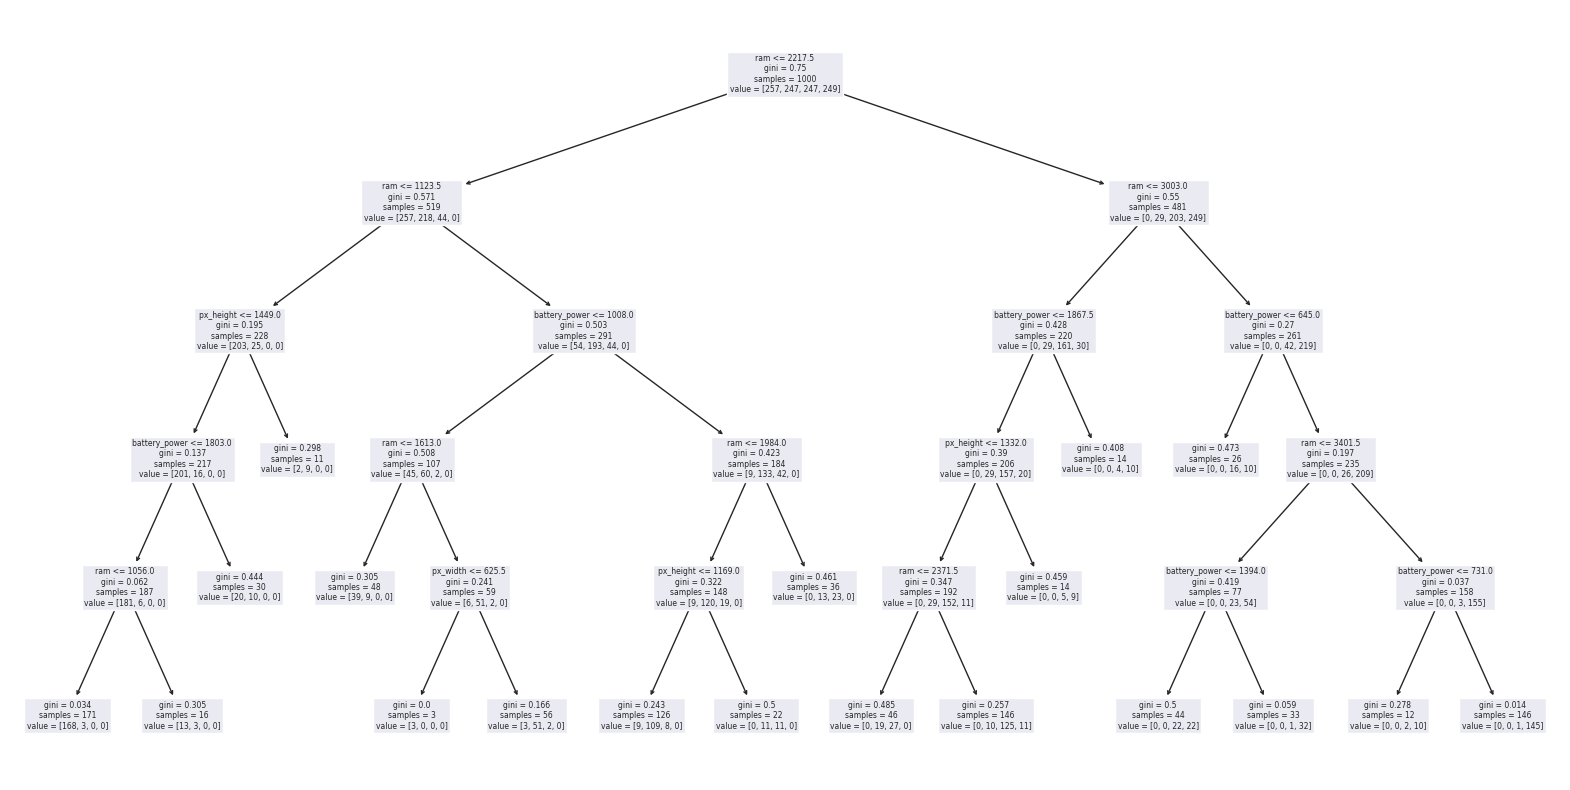

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=clf.feature_names_in_);

Нормализуйте данные и обучите дерево на них. Как нормализация повлияла на результаты предсказания?

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
normalize(X_train, norm="l1")

array([[2.28923162e-01, 2.30536920e-04, 5.30234917e-04, ...,
        0.00000000e+00, 0.00000000e+00, 2.30536920e-04],
       [3.22003578e-01, 0.00000000e+00, 1.92921534e-04, ...,
        1.75383212e-04, 1.75383212e-04, 1.75383212e-04],
       [1.08695652e-01, 0.00000000e+00, 1.21544659e-04, ...,
        1.73635227e-04, 0.00000000e+00, 1.73635227e-04],
       ...,
       [1.11888485e-01, 0.00000000e+00, 6.67592395e-05, ...,
        1.33518479e-04, 0.00000000e+00, 1.33518479e-04],
       [2.00511995e-01, 1.15835930e-04, 1.62170302e-04, ...,
        1.15835930e-04, 1.15835930e-04, 1.15835930e-04],
       [1.06927011e-01, 1.66035731e-04, 2.15846450e-04, ...,
        1.66035731e-04, 0.00000000e+00, 1.66035731e-04]])

In [ ]:
normalize(X_test, norm="l1")

array([[2.36571208e-01, 1.75367834e-04, 3.85809235e-04, ...,
        1.75367834e-04, 0.00000000e+00, 1.75367834e-04],
       [2.53765659e-01, 0.00000000e+00, 4.94209158e-04, ...,
        2.14873547e-04, 2.14873547e-04, 0.00000000e+00],
       [1.35094415e-01, 0.00000000e+00, 2.76215348e-04, ...,
        2.51104861e-04, 2.51104861e-04, 2.51104861e-04],
       ...,
       [1.65054228e-01, 0.00000000e+00, 2.23046254e-04, ...,
        0.00000000e+00, 0.00000000e+00, 2.78807818e-04],
       [8.45538754e-02, 0.00000000e+00, 7.91702953e-05, ...,
        1.58340591e-04, 0.00000000e+00, 0.00000000e+00],
       [3.87133325e-01, 2.09828360e-04, 1.04914180e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=8)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=8)

In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.842, 0.776)

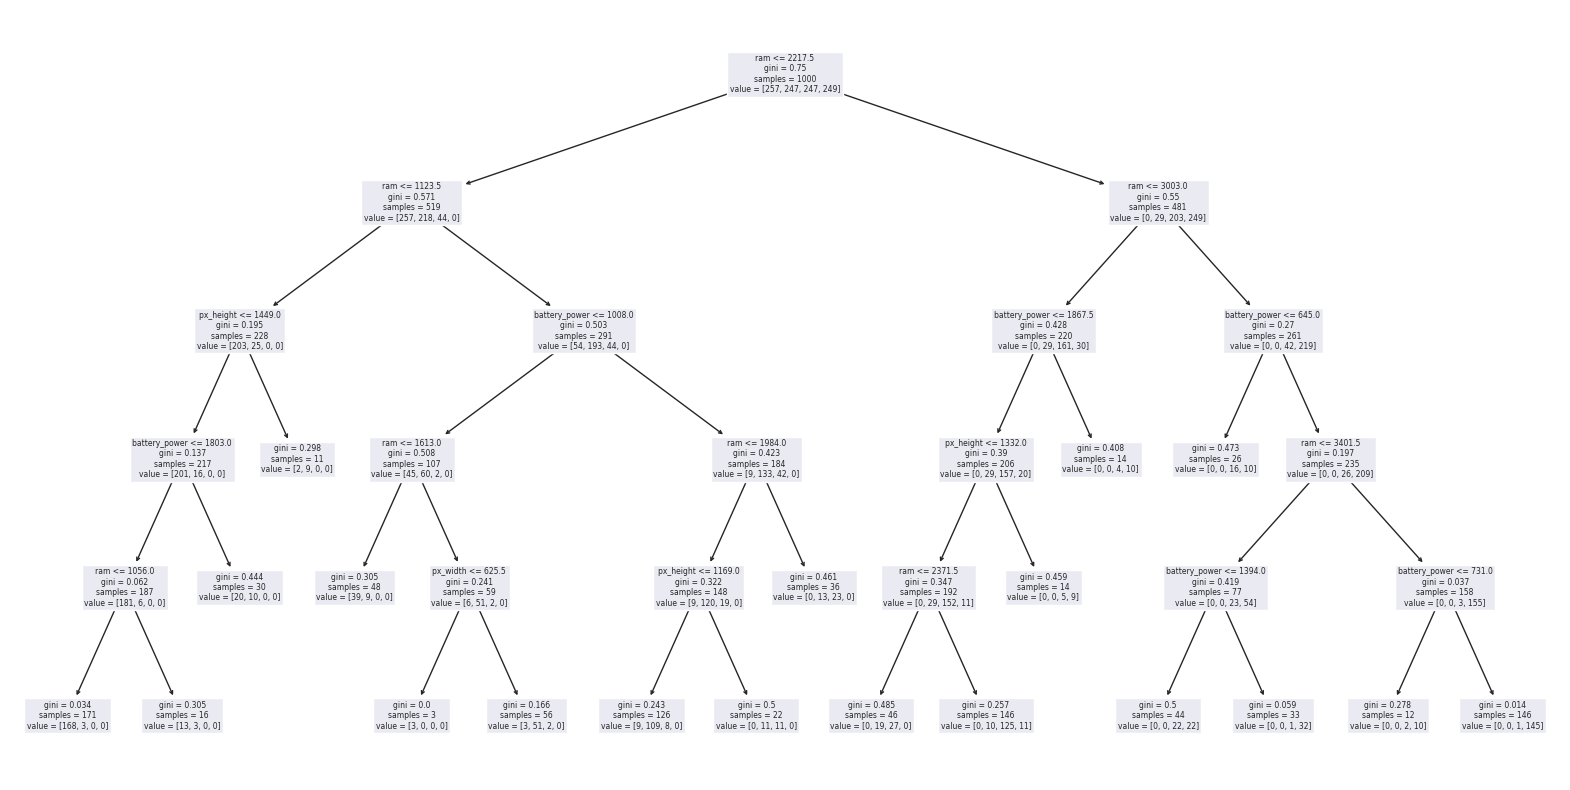

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=clf.feature_names_in_);

Получается нормализация никак не повлияла на дерево решений.

Подберём гиперпараметры.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {"max_depth": [2, 3, 5, 7, 10],
          "max_features": range(1, 30),
          "min_samples_split": [3, 5, 10, 20],
          "min_samples_leaf": [1, 2, 10],
          "criterion": ['gini', 'entropy']}

In [ ]:
rs = RandomizedSearchCV(DecisionTreeClassifier(), params, n_iter=200)

In [ ]:
clf_rnd = rs.fit(X_train, y_train)

In [ ]:
clf_rnd.score(X_test, y_test)

0.851

In [ ]:
clf.feature_importances_

array([0.09076493, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04744255, 0.00932865, 0.85246386, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

Подбор гиперпараметров улучшил accuracy на 0.04.

Выводы об использовании деревьев решений для классификации в целом и применительно к рассмотренному набору данных.

Минусы:

- Сильно переобучаются
- Сильно меняются при небольшом изменени выборки

Плюсы:

- Не замечено влияние выбросов на точность предсказаний
- Прост в понимании и интерпретации
- Не требует номрализации
- Позволяет работать с большим объёмом информации без специальных подготовительных процедур.

Применяем ансамблевые методы на основе деревьев решений

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
clf.score(X_test, y_test)

0.852

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=7).fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

0.893

AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=7).fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

0.595

Hist Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(random_state=7).fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

0.888